<a href="https://colab.research.google.com/github/AnushkaT-2002/DAA-/blob/main/SentimentAnalysisUsingTwitterfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#Twitter Sentiment Analysis Using Python

In [68]:
#import the libraries 
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [69]:
#Twitter API keys and Tokens
Access_token="1546858586437189634-2MmTjCZWYMVUDhRfTrEmYoHk0UUvKp"
Access_token_secret="glc9BrPiZXwrNyNA7CI4OZ4NfHIcegSQmwdgWnD39QPp3"
Consumer_key="KYYLiUqWCkCBGSnvF5RKR6XoH"
Consumer_secret="IrQEA0xApWF4NmPjCFDPmmrLLAG3pBKT1fy4jKH1r5Ne67xnNA"

In [70]:
#Creating OAuthHandler instance and make it equipped with access token
auth = tweepy.OAuthHandler(Consumer_key, Consumer_secret)
auth.set_access_token(Access_token, Access_token_secret)
api= tweepy.API(auth,wait_on_rate_limit=True)

In [71]:
#Verifying Our credentials using exception handling
try: 
  api.verify_credentials()
  print('Success')
except:
  print('failed')

Success


In [77]:
#Taking number of tweets we want to analyze as input
num= int(input("Enter the number of tweets you want to analyze:"))

Enter the number of tweets you want to analyze:60


In [78]:
#Taking hashtag or keyword as an input
searchTerm = input("Enter Keyword/Tag to search about: ")
search_query = searchTerm

Enter Keyword/Tag to search about: hello


In [79]:
# get tweets from the API
tweets = tweepy.Cursor(api.search,q=search_query,lang="en").items(num)
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 60


In [80]:
#Fetching the status of tweets using api.get_status() method of api class in tweepy module
text = api.get_status(id=tweet.id, tweet_mode='extended').full_text

In [82]:
df = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    df = df.append(pd.DataFrame({'user_name': tweet.user.name,'tweet': text,'hashtags': [hashtags if hashtags else None]}))
    df = df.reset_index(drop=True)
# show the dataframe
df


,user_name,tweet,hashtags
0,noemi,RT @foreverponyvg3: hello jasmine basmati de d...,None
1,Priyankitfan,RT @Arsalan77843430: Hello Gyzz\n\nI have rele...,None
2,Ivy 🌷,"RT @jwymeowz: hello , im elle. she/her new t...",None
3,marina,RT @gentjana_EA: Hello my friends ❤️ the best ...,None
4,bonnie ⟢,RT @wonuversee: HELLO https://t.co/8cDE6i2bLx,None
5,rr,Hello. I’m selling my tickets for The 1975 in ...,None
6,Boreddy Vishnu Vardhan Reddy,RT @SarangSood: Hello! This is a master thread...,None
7,Yass✘ᥫ᭡ψ ☀🐰🌈,RT @petite_m0i: First EP of WatTine Daily Life...,None
8,َeila,RT @hrtcoups: SVT ARE SO UNSERIOUS WHEN THEY A...,None
9,sandra Smith,@paulhannan1234 Hello 👋,None


In [84]:
#Method to remove hashtags, retweets, mentions and urls from the tweets
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text) #r tells that it is a raw string
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
df['tweet']= df['tweet'].apply(cleanText)
df

,user_name,tweet,hashtags
0,noemi,: hello jasmine basmati de dinorado ackkk supe...,None
1,Priyankitfan,: Hello Gyzz\n\nI have released more than 50+ ...,None
2,Ivy 🌷,": hello , im elle. she/her new to stantwt. ...",None
3,marina,_EA: Hello my friends ❤️ the best way to spend...,None
4,bonnie ⟢,: HELLO,None
5,rr,Hello. I’m selling my tickets for The 1975 in ...,None
6,Boreddy Vishnu Vardhan Reddy,: Hello! This is a master thread that contains...,None
7,Yass✘ᥫ᭡ψ ☀🐰🌈,_m0i: First EP of WatTine Daily Life in 2023🎉🎉...,None
8,َeila,: SVT ARE SO UNSERIOUS WHEN THEY ATTEND AWARD ...,None
9,sandra Smith,Hello 👋,None


In [85]:
#Calculating subjectivity of tweets using TextBlob library 
def getSub(text):
  return TextBlob(text).sentiment.subjectivity

#Calculating polarity of tweets using TextBlob library 
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['tweet'].apply(getSub)
df['Polarity']=df['tweet'].apply(getPolarity)
df

,user_name,tweet,hashtags,Subjectivity,Polarity
0,noemi,: hello jasmine basmati de dinorado ackkk supe...,None,0.666667,0.520833
1,Priyankitfan,: Hello Gyzz\n\nI have released more than 50+ ...,None,0.511905,0.361905
2,Ivy 🌷,": hello , im elle. she/her new to stantwt. ...",None,0.377273,0.168182
3,marina,_EA: Hello my friends ❤️ the best way to spend...,None,0.300000,1.000000
4,bonnie ⟢,: HELLO,None,0.000000,0.000000
5,rr,Hello. I’m selling my tickets for The 1975 in ...,None,0.500000,0.390625
6,Boreddy Vishnu Vardhan Reddy,: Hello! This is a master thread that contains...,None,0.625000,0.175000
7,Yass✘ᥫ᭡ψ ☀🐰🌈,_m0i: First EP of WatTine Daily Life in 2023🎉🎉...,None,0.166667,0.125000
8,َeila,: SVT ARE SO UNSERIOUS WHEN THEY ATTEND AWARD ...,None,0.400000,0.800000
9,sandra Smith,Hello 👋,None,0.000000,0.000000


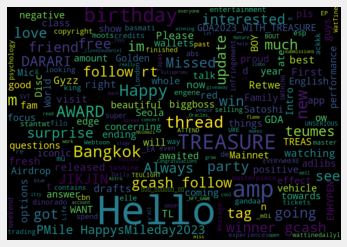

In [86]:
#representing the data in worldcloud form
allWords = ' '.join( [twts for twts in df['tweet']])
wordCloud = WordCloud(width=1000,height=700, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [87]:
#categorising as positive, negative and neutral
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,user_name,tweet,hashtags,Subjectivity,Polarity,Analysis
0,noemi,: hello jasmine basmati de dinorado ackkk supe...,None,0.666667,0.520833,Positive
1,Priyankitfan,: Hello Gyzz\n\nI have released more than 50+ ...,None,0.511905,0.361905,Positive
2,Ivy 🌷,": hello , im elle. she/her new to stantwt. ...",None,0.377273,0.168182,Positive
3,marina,_EA: Hello my friends ❤️ the best way to spend...,None,0.300000,1.000000,Positive
4,bonnie ⟢,: HELLO,None,0.000000,0.000000,Neutral
5,rr,Hello. I’m selling my tickets for The 1975 in ...,None,0.500000,0.390625,Positive
6,Boreddy Vishnu Vardhan Reddy,: Hello! This is a master thread that contains...,None,0.625000,0.175000,Positive
7,Yass✘ᥫ᭡ψ ☀🐰🌈,_m0i: First EP of WatTine Daily Life in 2023🎉🎉...,None,0.166667,0.125000,Positive
8,َeila,: SVT ARE SO UNSERIOUS WHEN THEY ATTEND AWARD ...,None,0.400000,0.800000,Positive
9,sandra Smith,Hello 👋,None,0.000000,0.000000,Neutral


In [88]:
#positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i]=='Positive'):
     print(str(j) + ')' +sortedDF['tweet'][i])
     print()
     j=j+1

1): hello jasmine basmati de dinorado ackkk super gandaa!!

credits to abs-cbn entertainment 
[no copyright infringement in…

2): Hello Gyzz

I have released more than 50+ fresh drafts right now

Please visit to my TL (  ) and Retwe…

3): hello , im  elle. she/her new  to  stantwt. im  looking  for  , engene, once moots  esp  filo , like  and  rts  are  very  mu…

4)_EA: Hello my friends ❤️ the best way to spend your weekend it's watching our king's masterpiece even if you finished watching…

5)Hello. I’m selling my tickets for The 1975 in London! Message me if you’re interested!!

6): Hello! This is a master thread that contains my past threads on options, trading psychology and my own experiences in the m…

7)_m0i: First EP of WatTine Daily Life in 2023🎉🎉

Tapas:


Webtoon: 


wattinedailyl…

8): SVT ARE SO UNSERIOUS WHEN THEY ATTEND AWARD SHOWS LIKE HELLO URE BOUT TO WIN SMTHING 

9)@_iloveyoudaniel: hello beautiful people &amp; happy new year!  is open for submissions, &amp; I’d lo

In [89]:
#Negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['tweet'][i])
    print()
    j=j+1

1) Hello, Nader!

We totally understand where you're coming from, unfortunately due to global Semi-Conductor supply shortages, GM vehicles may not have some standard features and options, did our dealer inform you about this before buying the vehicle?

2): There must be quite a few teumes at the red carpet area for the mc to ask teumes if they want to talk to trs abit....(pretty…

3): [140414] naver starcast update — south america photo diary

hello. this is key from shinee.
from april 4th to 9th, we w…

4)Ryn the fucking JEDI HELLO?!🤩 BellsHells CriticalRoleSpoilers CriticalRole



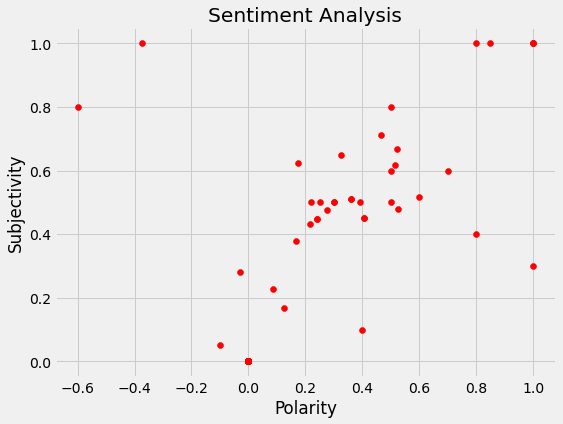

In [90]:
#Scatter plot represenation of data
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [91]:
#percentage of positive tweets
ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['tweet']

round((ptweets.shape[0]/df.shape[0])*100, 1)

58.3

In [93]:
#percentage of negative
ntweets = df[df.Analysis=='Negative']
ntweets = ntweets['tweet']

round((ntweets.shape[0]/df.shape[0])*100,1)

6.7

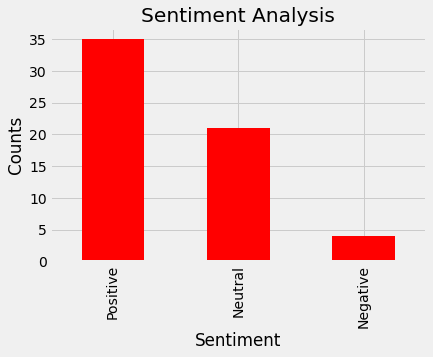

In [94]:
#Bar graph representation of data
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar',color='red')
plt.show()